In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

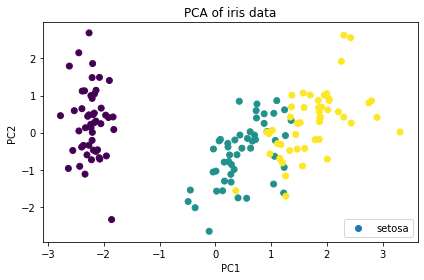

(2, 4)
(2, 4)


In [20]:
#### Pipeline PCA scales the data based on 

data = load_iris()
n_comps = 2
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comps))])
pca_scores = pipeline.fit_transform(data["data"])
pca = pipeline.named_steps['pca']

## visualize the results
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=data["target"])
## add labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of iris data")
plt.tight_layout()
## add target as legends
plt.legend(data["target_names"])
plt.show()

### extract the PC components
print(pca.components_.shape)
pca_loading = pca.components_
print(pca_loading.shape)

### extract the loading matrix

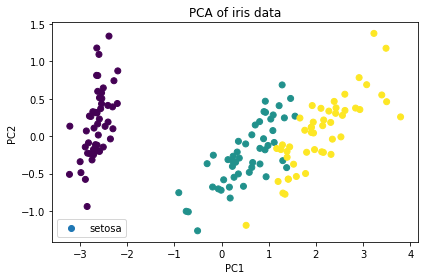

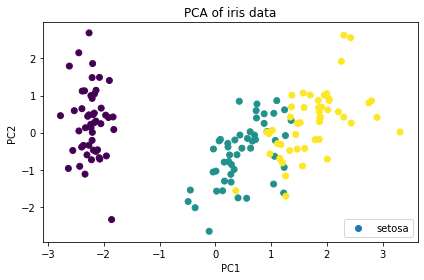

In [13]:
n_comps = 2
pca = PCA(n_components=n_comps)
## apply PCA to the iris data
X1 = data["data"]
X2 = StandardScaler().fit_transform(data["data"])

X_pca1 = pca.fit_transform(X1)
## visualize the results
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=data["target"])
## add labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of iris data")
plt.tight_layout()
## add target as legends
plt.legend(data["target_names"])
plt.show()


X_pca2 = pca.fit_transform(X2)
## visualize the results
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=data["target"])
## add labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of iris data")
plt.tight_layout()
## add target as legends
plt.legend(data["target_names"])
plt.show()



In [4]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]
print(X.shape)
### print head of X
print(X[:5,:])

(150, 4)
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


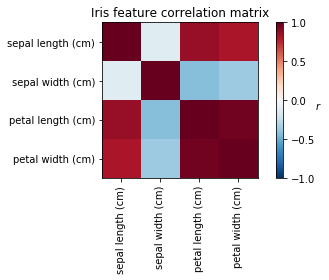

In [4]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

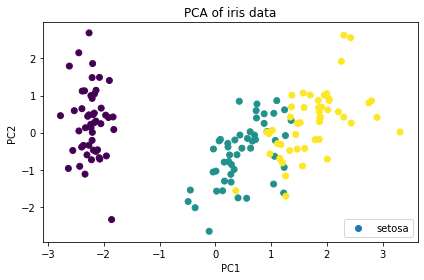

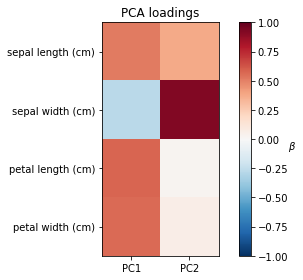

In [13]:
n_comps = 2
pca = PCA(n_components=n_comps)
## apply PCA to the iris data
X_pca = pca.fit_transform(X)
## visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["target"])
## add labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of iris data")
plt.tight_layout()
## add target as legends
plt.legend(data["target_names"])
## extract the loadings
loadings = pca.components_.T
## visualize the loadings
plt.figure()
plt.imshow(loadings, cmap="RdBu_r", vmin=-1, vmax=1)
plt.colorbar().ax.set_ylabel("$\\beta$", rotation=0)
plt.xticks([0, 1], ["PC1", "PC2"])
plt.yticks([0, 1, 2, 3], list(feature_names))
plt.title("PCA loadings")
plt.tight_layout()





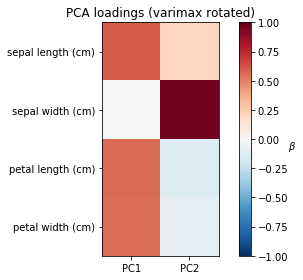

In [24]:

from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 100, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    Lambda = dot(Phi, R)

    return {'rotloadings':Lambda, 'rotmat':R }




## apply varimax rotation to the loadings
loadings_rot = varimax(loadings)['rotloadings']
rotmat = varimax(loadings)['rotmat']
## visualize the loadings
plt.figure()
plt.imshow(loadings_rot, cmap="RdBu_r", vmin=-1, vmax=1)
plt.colorbar().ax.set_ylabel("$\\beta$", rotation=0)
plt.xticks([0, 1], ["PC1", "PC2"])
plt.yticks([0, 1, 2, 3], list(feature_names))
plt.title("PCA loadings (varimax rotated)")
plt.tight_layout()


In [ ]:
"""
source: https://stats.stackexchange.com/questions/59213/how-to-compute-varimax-rotated-principal-components-in-r
There are several ways to obtain the rotated scores:

1. One can manually use varimax function to rotate the loadings, and then use the new rotated loadings to obtain the scores; 
one needs to multiple the data with the transposed pseudo-inverse of the rotated loadings (see formulas in this answer by @ttnphns). This will also yield standardized scores.
https://stats.stackexchange.com/questions/126885/methods-to-compute-factor-scores-and-what-is-the-score-coefficient-matrix-in

invLoadings     <- t(pracma::pinv(rotatedLoadings))
scores          <- scale(original data) %*% invLoadings # Scores computed via rotated loadings


2. One can use varimax function to rotate the loadings, and then use the $rotmat rotation matrix to rotate the standardized scores obtained with prcomp.
scale(original pc scores) %*% rotmat

3.  dot product of the original data with the rotated loadings. This might not be true since After the varimax rotation, the loading vectors are not orthogonal 
anymore (even though the rotation is called "orthogonal"), 
so one cannot simply compute orthogonal projections of the data onto the rotated loading directions.

scale(original data) %*% rotatedLoadings
"""

(150, 2)
(2, 2)
[[ 0.95929193 -0.28241636]
 [ 0.28241636  0.95929193]]


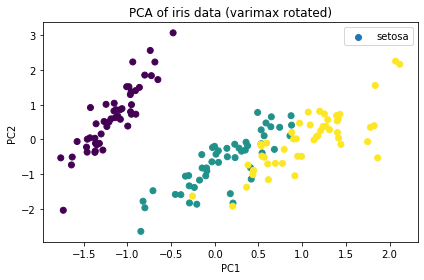

In [27]:
### calculate the rotated principal components 
## method: scale(original pc scores) %*% rotmat
X_pca = StandardScaler().fit_transform(X_pca)
X_pca_rot = dot(X_pca, rotmat)


plt.figure()
plt.scatter(X_pca_rot[:, 0], X_pca_rot[:, 1], c=data["target"])
## add labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of iris data (varimax rotated)")
plt.tight_layout()
## add target as legends
plt.legend(data["target_names"])


(4, 2)


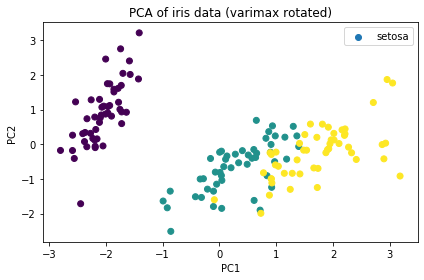

In [28]:
### calculate the rotated principal components 
# method: scale(original data) %*% rotatedLoadings
X_pca_rot = dot(X, loadings_rot)

## visualize the results
plt.figure()
plt.scatter(X_pca_rot[:, 0], X_pca_rot[:, 1], c=data["target"])
## add labels
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of iris data (varimax rotated)")
plt.tight_layout()
## add target as legends
plt.legend(data["target_names"])


In [9]:
#### scipy based implementation of varimax rotation
def varimax_scipy(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from scipy import eye, asarray, dot, sum
    from scipy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T, asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    Lambda = dot(Phi, R)
    return {'rotloadings':Lambda, 'rotmat':R } #dot(Phi, R) is equal to loading matrix - R is the rotated matrix


In [ ]:
""" R base implementation of varimax rotation
varimax <- function (x, normalize = TRUE, eps = 1e-05) {
    nc <- ncol(x) #=k
    if (nc < 2) 
        return(x)
    if (normalize) {
        sc <- sqrt(drop(apply(x, 1, function(x) sum(x^2))))
        x <- x/sc
    }
    p <- nrow(x)
    TT <- diag(nc) #=R
    d <- 0
    for (i in 1:1000) {
        z <- x %*% TT  # Matrix multiplication =lambda
        B <- t(x) %*% (z^3 - z %*% diag(drop(rep(1, p) %*% z^2))/p)
        sB <- La.svd(B)
        TT <- sB$u %*% sB$vt 
        dpast <- d
        d <- sum(sB$d)
        if (d < dpast * (1 + eps)) 
            break
    }
    z <- x %*% TT #lambda
    if (normalize) 
        z <- z * sc
    dimnames(z) <- dimnames(x)
    class(z) <- "loadings"
    list(loadings = z, rotmat = TT)
}

## Usage example
varimax_res <- varimax(loading_matrix)
rotatedLoadings <- varimax_res$loadings
## calculating the PC scores matrix
invLoadings     <- t(pracma::pinv(rotatedLoadings))
scores          <- scale(initial_data) %*% invLoadings ## this second scaling is not necessary

## compacting the rotated loading and score matrices in a list
rotated_data <- list(rotLoadings=rotatedLoadings, rotScores = scores)

"""
